In [4]:
from networkx.algorithms import bipartite
from collections import defaultdict
import os
import pickle
import networkx as nx
import pandas as pd
from tqdm import tqdm
from dotmotif import Motif, GrandIsoExecutor

def print_graph_info(G):
    print("Graph Information\n")

    # Print Node Information
    print("Nodes:")
    for idx, node in enumerate(G.nodes(data=True)):
        node_id, node_attrs = node
        print(f"Node ID: {node_id}, Attributes: {node_attrs}")
        if idx == 20:
            break
            
    print("\nEdges:")
    # Print Edge Information
    for idx, edge in enumerate(G.edges(data=True)):
        source, target, edge_attrs = edge
        print(f"Edge: ({source}, {target}), Attributes: {edge_attrs}")
        
        if idx == 20:
            break
####################################################################################################
filename = "graph_1999-12-31.pkl"
folder_path = "C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs"
file_path = os.path.join(folder_path, filename)
G = pickle.load(open(file_path, 'rb'))

print_graph_info(G)




Graph Information

Nodes:
Node ID: 1 800 CONTACTS INC, Attributes: {'bipartite': 0, 'type': 'mid'}
Node ID: 1 800 FLOWERS COM INC, Attributes: {'bipartite': 0, 'type': 'mid'}
Node ID: 180 LIFE SCIENCES CORP, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST CENTURY BANCSHARES INC, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST CONSTITUTION BANCORP, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST INDEPENDENCE FINANCIAL GROUP INC, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST PACIFIC BANCORP, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST SOURCE CORP, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: 1ST STATE BANCORP INC, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 1ST UNITED BANCORP INC, Attributes: {'bipartite': 0, 'type': 'mid'}
Node ID: 21ST CENTURY INSURANCE GROUP, Attributes: {'bipartite': 0, 'type': 'mid'}
Node ID: 22ND CENTURY GROUP INC, Attributes: {'bipartite': 0, 'type': 'small'}
Node ID: 24 7 R

In [5]:
stocks = set(n for n,d in G.nodes(data=True) if d['bipartite']==0)
investors = set(G) - stocks
B = bipartite.projected_graph(G, investors)

In [7]:
print_graph_info(B)


Graph Information

Nodes:
Node ID: CAPITAL STRATEGIES ADVISORS INC, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: BLUE CREEK INVESTMENT PARTNERS LLC, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: SDS CAPITAL GROUP SPC LTD, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: OWL CREEK ASSET MANAGEMENT LP, Attributes: {'bipartite': 1, 'type': 'medium_investor'}
Node ID: DSC ADVISORS LP, Attributes: {'bipartite': 1, 'type': 'medium_investor'}
Node ID: STICHTING PENSIOENFONDS ABP, Attributes: {'bipartite': 1, 'type': 'medium_investor'}
Node ID: PRECOCITY CAPITAL LP, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: SECURITY NATIONAL BANK OF SIOUX CITY IOWA /IA/, Attributes: {'bipartite': 1, 'type': 'medium_investor'}
Node ID: FIRST UNITED BANK TRUST/, Attributes: {'bipartite': 1, 'type': 'small_investor'}
Node ID: HARRIS WILLIAM INVESTORS INC, Attributes: {'bipartite': 1, 'type': 'medium_investor'}
Node ID: VERTICAL GROUP LP, At

# INITIAL MOTIFS

In [8]:

####################################################################################################

# Function to calculate disparity measure of a graph
def calculate_disparity(G):
    disparity_scores = []
    for node in G.nodes():
        degree = G.degree(node)  # Total number of edges for node i
        if degree > 0:  # To avoid division by zero
            disparity = sum([(1 / degree)**2 for _ in range(degree)])
            disparity_scores.append(disparity)
    # Avoid division by zero if there are no nodes
    return sum(disparity_scores) / len(G.nodes()) if G.nodes() else 0


####################################################################################################


import os
import pickle
import networkx as nx
import pandas as pd

def open_and_close_graphs(folder_path):
    """
    Opens each graph in pickle format from a folder, extracts various properties, and then closes it.
    
    :param folder_path: Path to the folder containing the graphs.
    :return: A DataFrame with columns for filename, motifs1, motifs2, motifs3, motifs4, disparity, density, and clustering.
    """
    data = {
        'Quarter': [],
        'disparity':[],
        'density':[],
        'clustering':[],
        'disparity_b':[],
        'density_b':[],
        'clustering_b':[]

        }

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pkl"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                G = pickle.load(file)
                
                filename = filename.split('_')[1].split('.')[0]
                disparity = calculate_disparity(G) 
                density = nx.density(G)
                clustering = nx.average_clustering(G)
                
                data['Quarter'].append(filename)
                data['disparity'].append(disparity)
                data['density'].append(density)
                data['clustering'].append(clustering)
                
                stocks = set(n for n,d in G.nodes(data=True) if d['bipartite']==0)
                investors = set(G) - stocks
                B = bipartite.projected_graph(G, investors)
                
                print("b calc")
                # disparity_b = calculate_disparity(B) 
                density_b = nx.density(B)
                clustering_b = nx.average_clustering(B)
                
                data['disparity_b'].append(disparity_b)
                data['density_b'].append(density_b)
                data['clustering_b'].append(clustering_b)
     
                
    return pd.DataFrame(data)

    


In [9]:
ls = open_and_close_graphs("""C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs""")

  0%|                                                                                           | 0/74 [00:00<?, ?it/s]

b calc


  0%|                                                                                           | 0/74 [00:43<?, ?it/s]

KeyboardInterrupt



In [ ]:
ls.head()

In [25]:
dot_com_start = '2000-06-30'
dot_com_end = '2002-12-31'

financial_start = '2007-12-31'
financial_end = '2009-12-31'

oil_start = '2014-06-30'
oil_end =  '2016-03-31'

In [ ]:
                # FILTER FINANCE SECTOR
                
                G_fin = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d.get('sector') == 'Finance Insurance And Real Estate')
                
                disparity_fin = calculate_disparity(G_fin) 
                density_fin = nx.density(G_fin)
                clustering_fin = nx.average_clustering(G_fin)
                data['Disparity_fin'].append(disparity_fin)
                data['Density_fin'].append(density_fin)
                data['Clustering_fin'].append(clustering_fin)
                
                
                # FILTER OIL SECTOR
                G_oil = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d.get('sector') == 'Transportation Communications Electric Gas And Sanitary Service')
                
                disparity_oil = calculate_disparity(G_oil) 
                density_oil = nx.density(G_oil)
                clustering_oil = nx.average_clustering(G_oil)
                data['Disparity_oil'].append(disparity_oil)
                data['Density_oil'].append(density_oil)
                data['Clustering_oil'].append(clustering_oil)
                
                # FILTER SERVICES SECTOR
                G_services = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d.get('sector') == 'Services')
                
                disparity_serv = calculate_disparity(G_services) 
                density_serv = nx.density(G_services)
                clustering_serv = nx.average_clustering(G_services)
                data['Disparity_serv'].append(disparity_serv)
                data['Density_serv'].append(density_serv)
                data['Clustering_serv'].append(clustering_serv)

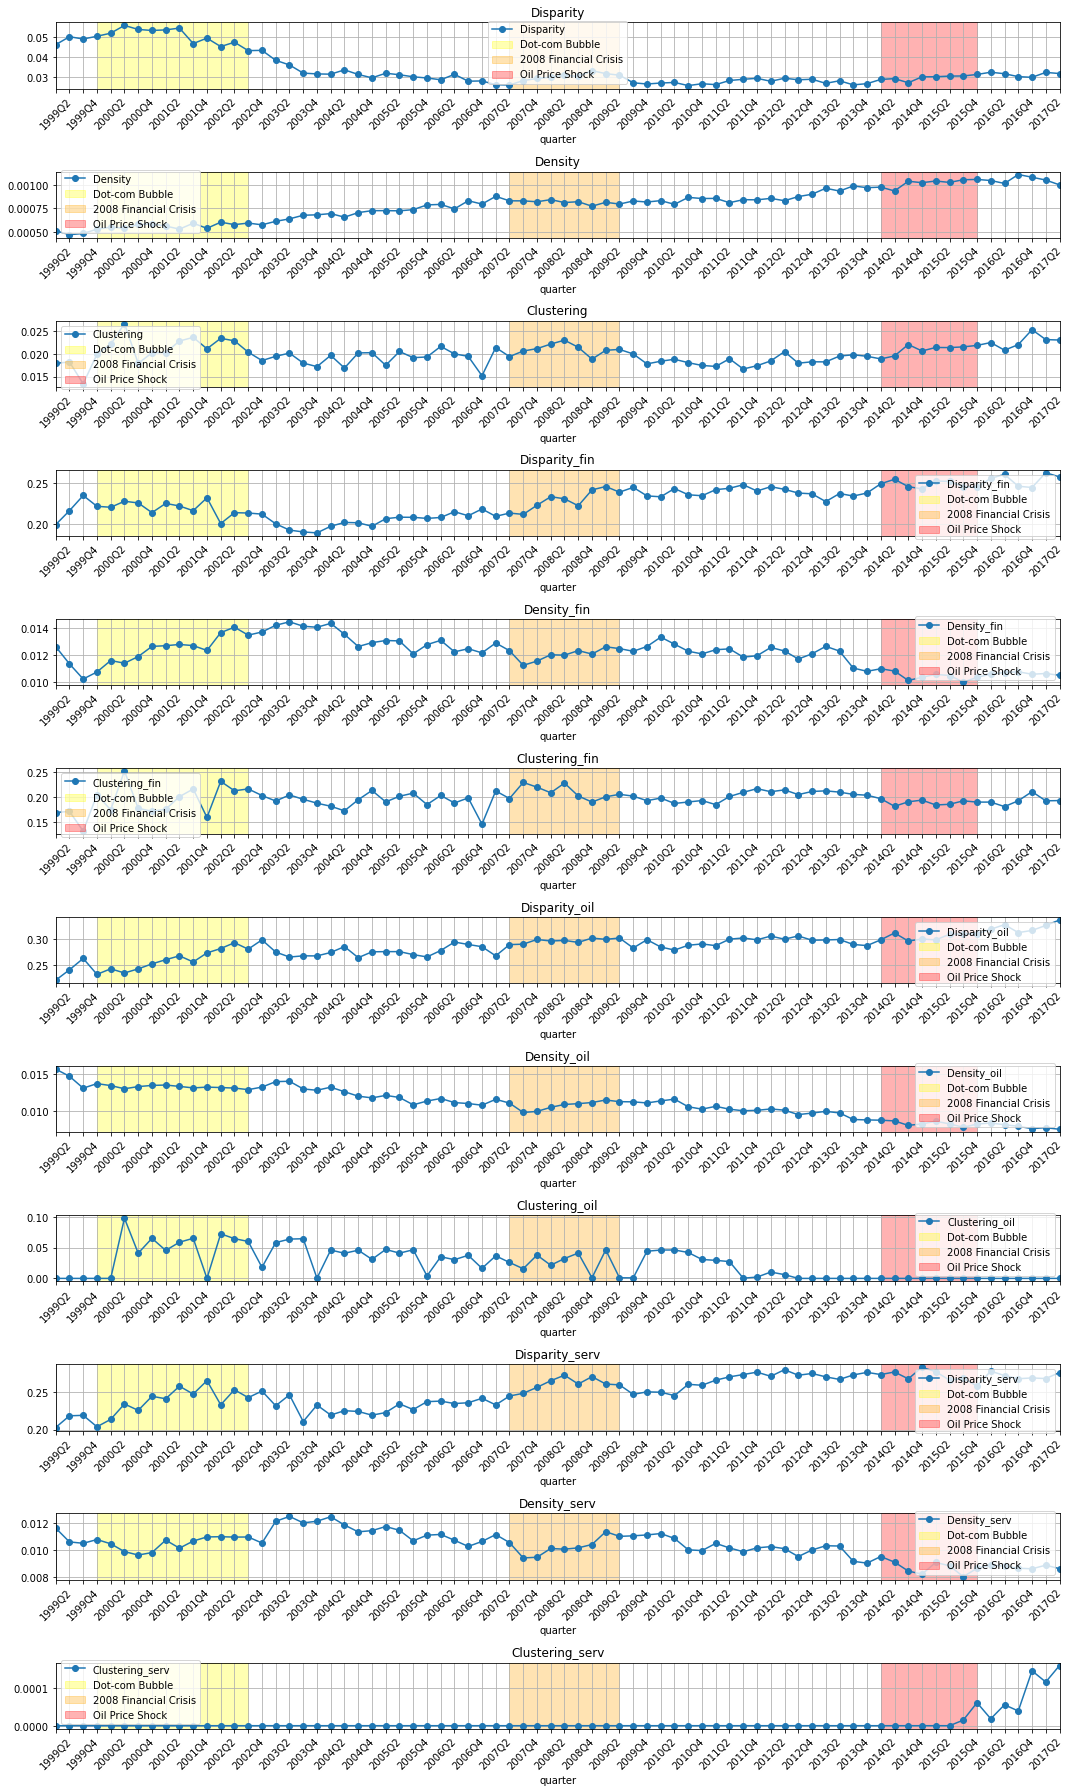

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'ls' is your DataFrame
df = ls

# Convert 'quarter' to a period and sort
df['quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')
df = df.sort_values('quarter')

# Define periods for historical events
dot_com_start, dot_com_end = pd.Period('2000-Q1', freq='Q'), pd.Period('2002-Q4', freq='Q')
financial_start, financial_end = pd.Period('2007-Q3', freq='Q'), pd.Period('2009-Q3', freq='Q')
oil_start, oil_end = pd.Period('2014-Q2', freq='Q'), pd.Period('2016-Q1', freq='Q')

# Plotting
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(15, 25))

# Setting custom x-axis ticks and labels (skipping every other quarter for clarity)
quarters = df['quarter'].unique()
tick_labels = [str(q) if i % 2 == 0 else '' for i, q in enumerate(quarters)]  # Skip every other quarter

for i, column in enumerate(['Disparity','Density','Clustering' ,'Disparity_fin', 'Density_fin' ,'Clustering_fin','Disparity_oil' ,'Density_oil' ,'Clustering_oil','Disparity_serv','Density_serv','Clustering_serv']):
    df.plot(x='quarter', y=column, ax=axes[i], title=column, marker='o')
    
    # Apply colored spans for each subplot
    axes[i].axvspan(dot_com_start, dot_com_end, color='yellow', alpha=0.3, label='Dot-com Bubble')
    axes[i].axvspan(financial_start, financial_end, color='orange', alpha=0.3, label='2008 Financial Crisis')
    axes[i].axvspan(oil_start, oil_end, color='red', alpha=0.3, label='Oil Price Shock')

    # Setting custom tick marks and rotating them
    axes[i].set_xticks(quarters)
    axes[i].set_xticklabels(tick_labels, rotation=45)
    
    # Adding legend and grid to each subplot
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# comment

In [17]:
# OVERALL GRAPHTAN INDUSTRY  E GÖRE FILTRELEYIP AYNI ŞEYİ APPLY EDEBİLİRZ.
# HİSSE GRUBU BAZINDA

# HER FİLTREYE GÖRE AYNI COUNTLARI APPLY EDEBİLİRİZ.

# TİMESERİES ANOMALY


# çok genel şuan. spesifikleştirip anomalilere bakılabilir.
#gözle görülen yeterli değil, anomalyi göster.zscore


# belirli periyottaki anomaliyi işaretleyip, burası zaten o periyoda denk geliyor demek

# kendi içinde validation gerek yok, metrici
#analizin amacı, nebuldunuz, bişiler gösteriyor mu --> bunlar şart


# hangi sektörde hangi metric işe yarıyoru bulup

# DISCOVER MOTIFS WITH FUNCTIONS

In [13]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from pandas import PeriodIndex, Period
from tqdm import tqdm
##########################################################################################
def motif_discovery(motif_finders):
    """MAIN FUNCTION FOR MOTIF DISCOVERY AND PLOTTING"""
    
    data = {'Quarter': []}
    for i in range(len(motif_finders)):
        data[f'Motifs{i+1}'] = []

    folder_path = "C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs"

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pkl"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                G = pickle.load(file)

                quarter = filename.split('_')[1].split('.')[0]
                data['Quarter'].append(quarter)

                # Apply each motif finder function
                for i, motif_finder in enumerate(motif_finders):
                    motif_count = motif_finder(G)
                    data[f'Motifs{i+1}'].append(motif_count)

    df = pd.DataFrame(data)

    # Convert 'quarter' to a period and sort
    df['quarter'] = PeriodIndex(df['Quarter'], freq='Q')
    df = df.sort_values('quarter')

    # Define periods for historical events
    historical_events = {
        'Dot-com Bubble': (Period('2000-Q1', freq='Q'), Period('2002-Q4', freq='Q'), 'yellow'),
        '2008 Financial Crisis': (Period('2007-Q3', freq='Q'), Period('2009-Q3', freq='Q'), 'orange'),
        'Oil Price Shock': (Period('2014-Q2', freq='Q'), Period('2016-Q1', freq='Q'), 'red')
    }

    # Plotting
    nrows = len(motif_finders)
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(15, 5*nrows))

    # Adjust for the case of a single subplot
    if nrows == 1:
        axes = [axes]

    quarters = df['quarter'].unique()
    tick_labels = [str(q) if i % 2 == 0 else '' for i, q in enumerate(quarters)]

    for i in range(nrows):
        df.plot(x='quarter', y=f'Motifs{i+1}', ax=axes[i], title=f'Motifs{i+1}', marker='o')
        for event, (start, end, color) in historical_events.items():
            axes[i].axvspan(start, end, alpha=0.3, color=color, label=event)
        axes[i].set_xticks(quarters)
        axes[i].set_xticklabels(tick_labels, rotation=45)
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

##########################################################################################



100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [01:49<00:00,  1.48s/it]


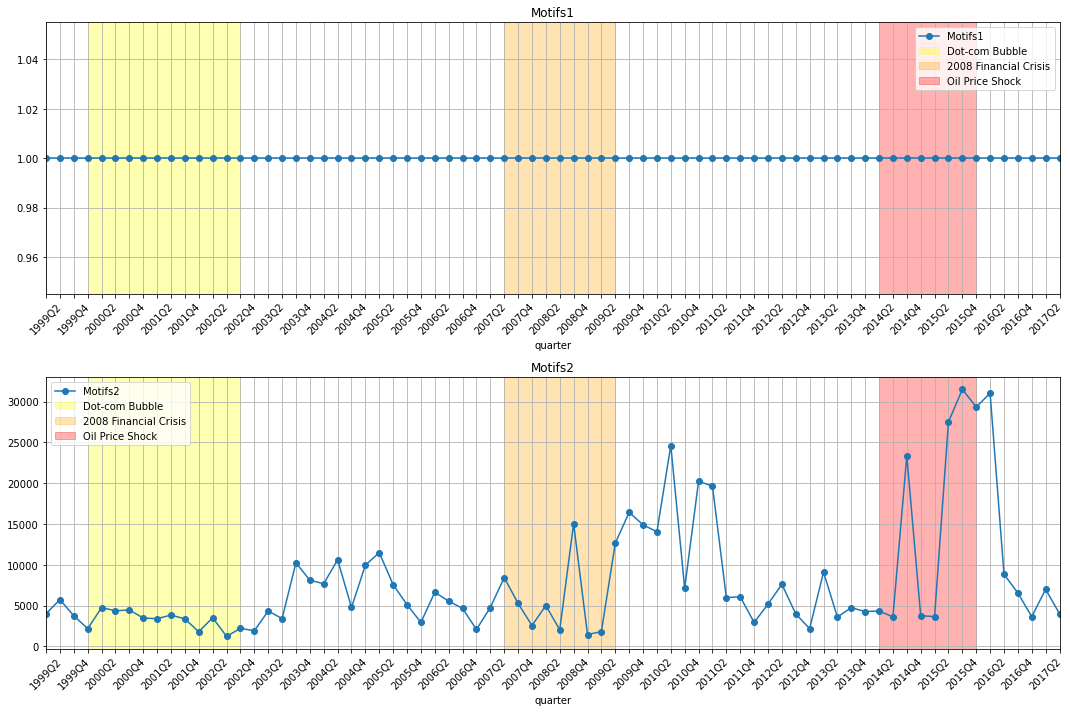

In [103]:
from collections import Counter

def sector_dominant_investor_motif(G):
    motif_count = 0
    

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        sectors_invested = [G.nodes[stock_node].get('sector') for stock_node in G.successors(investor_node)]
        sector_count = Counter(sectors_invested)

        dominant_sector = sector_count.most_common(1)
        if dominant_sector and dominant_sector[0][1] > 1:  # More than one investment in a single sector
            motif_count += 1
            

    return motif_count


##########################################################################################
def late_filing_high_volume_shift_motif(G):
    motif_count = 0
    # motifs = []

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        for stock_node, edge_data in G[investor_node].items():
            if edge_data.get('filing_delay') == 'late' and edge_data.get('volume_category') == 'high':
                motif_count += 1
                # motifs.append((investor_node, stock_node))

    return motif_count



##########################################################################################
def motif_finder(G):
    motif_count = 0
    motifs = []

    for stock_node in filter(lambda n: G.nodes[n].get('bipartite') == 0, G.nodes):
        for investor_node in G.predecessors(stock_node):
            edge_data = G.get_edge_data(investor_node, stock_node)

            # Check for late filing, large transactions in the specified sector
            if edge_data.get('filing_delay') == 'late' and \
               edge_data.get('share_change') in ['Large Buy', 'Large Sale']:

                motif_count += 1
                

    return motif_count
##########################################################################################
def motif_finder2(G):
    motifs = []
    motif_count = 0

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        industry_late_buys = defaultdict(int)
        
        for stock_node, edge_data in G[investor_node].items():
            if edge_data.get('filing_delay') == 'late':
                industry = edge_data.get('equity_industry')
                industry_late_buys[industry] += 1

        # Check if the investor has late buys in the same industry from multiple sources
        for industry, count in industry_late_buys.items():
            if count > 1:  # More than one late buy in the same industry
                motifs.append((investor_node, industry, count))
                motif_count += 1

    return motif_count
##########################################################################################

motif_discovery([sector_focused_collaboration_motif, late_filing_high_volume_shift_motif])


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [03:56<00:00,  3.20s/it]


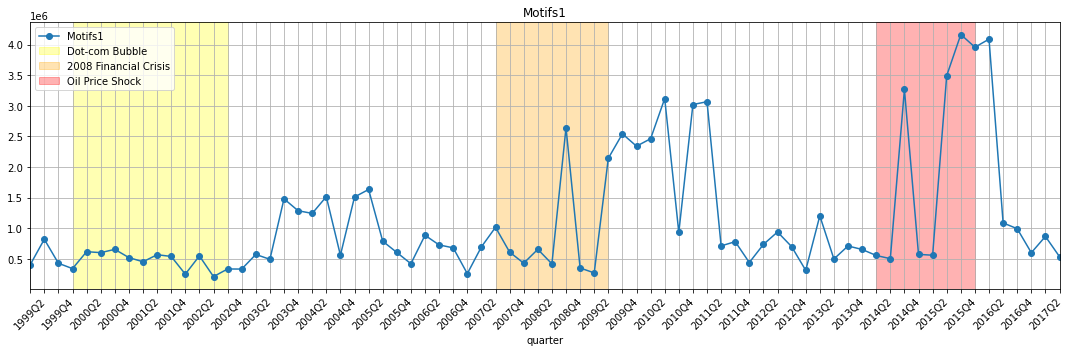

In [14]:
def find_three_node_motif(G):
    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Check if the edge from investor to stock has 'filing_delay' == 'Late'
                    if G.get_edge_data(node, stock).get('filing_delay') == 'late':
                        # Now find another investor with 'early' filing delay to the same stock
                        for other_investor in G.predecessors(stock):
                            if G.nodes[other_investor].get('bipartite') == 1:
                                if G.get_edge_data(other_investor, stock).get('filing_delay') == 'early':
                                    motif_count += 1
                                    motifs.append((node, stock, other_investor))

    return motif_count

# Call the function
motif_count = find_three_node_motif(G)


                            

motif_discovery([find_three_node_motif])


# DOTMOTİF

In [15]:

def dotmotif_discovery(motif_finders):
    """MAIN FUNCTION FOR MOTIF DISCOVERY AND PLOTTING"""
    
    data = {'Quarter': []}
    for i in range(len(motif_finders)):
        data[f'Motifs{i+1}'] = []

    folder_path = "C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs"

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pkl"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                
                # SETUP DOTMOTIF
                G = pickle.load(file)
                print("GRAPH LOADED")
                
                w = nx.get_edge_attributes(G, 'filing_delay')
                nx.set_edge_attributes(G, w, 'filingDelay')

                w = nx.get_edge_attributes(G, 'volatility_category')
                nx.set_edge_attributes(G, w, 'volatilityCategory')            

                w = nx.get_edge_attributes(G, 'volume_category')
                nx.set_edge_attributes(G, w, 'volumeCategory')
                
                executor = GrandIsoExecutor(graph=G)
                print("ATTRIBUTES ARE SET")
                quarter = filename.split('_')[1].split('.')[0]
                data['Quarter'].append(quarter)
                
                
                # Apply each motif finder function
                for i, motif_finder in enumerate(motif_finders):
                    triangle = Motif(motif_finder)
                    results = executor.find(triangle)
                    data[f'Motifs{i+1}'].append(len(results))

    df = pd.DataFrame(data)

    # Convert 'quarter' to a period and sort
    df['quarter'] = PeriodIndex(df['Quarter'], freq='Q')
    df = df.sort_values('quarter')

    # Define periods for historical events
    historical_events = {
        'Dot-com Bubble': (Period('2000-Q1', freq='Q'), Period('2002-Q4', freq='Q'), 'yellow'),
        '2008 Financial Crisis': (Period('2007-Q3', freq='Q'), Period('2009-Q3', freq='Q'), 'orange'),
        'Oil Price Shock': (Period('2014-Q2', freq='Q'), Period('2016-Q1', freq='Q'), 'red')
    }

    # Plotting
    nrows = len(motif_finders)
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(15, 5*nrows))

    # Adjust for the case of a single subplot
    if nrows == 1:
        axes = [axes]

    quarters = df['quarter'].unique()
    tick_labels = [str(q) if i % 2 == 0 else '' for i, q in enumerate(quarters)]

    for i in range(nrows):
        df.plot(x='quarter', y=f'Motifs{i+1}', ax=axes[i], title=f'Motifs{i+1}', marker='o')
        for event, (start, end, color) in historical_events.items():
            axes[i].axvspan(start, end, alpha=0.3, color=color, label=event)
        axes[i].set_xticks(quarters)
        axes[i].set_xticklabels(tick_labels, rotation=45)
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

In [16]:

m1 = """
    A -> B [sector = "Retail Trade", filingDelay = "late"] 
    A.type = "large_investor"
    B.type = "large"
    B -> C [sector = "Retail Trade", filingDelay = "late", volatilityCategory= "low"] 
    C.type = "large_investor"
    """


m2 = """
    A -> B [sector = "Retail Trade", filingDelay = "late"] 
    B -> C [sector = "Retail Trade", filingDelay = "late"] 
    """

motif_discovery([m2])

  0%|                                                                                           | 0/74 [00:00<?, ?it/s]


TypeError: 'str' object is not callable

In [ ]:
from dotmotif import Motif, GrandIsoExecutor

executor = GrandIsoExecutor(graph=my_networkx_graph)

triangle = Motif("""
A -> B
B -> C
C -> A
""")

results = executor.find(triangle)

In [153]:
from dotmotif import Motif, GrandIsoExecutor

folder_path = "C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs"

for filename in tqdm(os.listdir(folder_path)):
    if filename.endswith(".pkl"):
        file_path = os.path.join(folder_path, filename)
        
        
        with open(file_path, 'rb') as file:
            G = pickle.load(file)
            
            w = nx.get_edge_attributes(G, 'filing_delay')
            nx.set_edge_attributes(G, w, 'filingDelay')
            
            w = nx.get_edge_attributes(G, 'volatility_category')
            nx.set_edge_attributes(G, w, 'volatilityCategory')            
            
            w = nx.get_edge_attributes(G, 'volume_category')
            nx.set_edge_attributes(G, w, 'volumeCategory')                

            executor = GrandIsoExecutor(graph=G)
            triangle = Motif("""
                                A -> B [sector = "Retail Trade", filingDelay = "late"] 
                            A.type = "large_investor"
                            B.type = "large"
                            B -> C [sector = "Retail Trade", filingDelay = "late", volatilityCategory= "low"] 
                            C.type = "large_investor"
                            """)

            results = executor.find(triangle)
            
            break

  0%|                                                                                           | 0/74 [00:03<?, ?it/s]


In [154]:
len(results)

357

In [ ]:
# https://github.com/aplbrain/dotmotif/wiki/Attributes

In [ ]:

####################################################################################################

# Function to calculate disparity measure of a graph
def calculate_disparity(G):
    disparity_scores = []
    for node in G.nodes():
        degree = G.degree(node)  # Total number of edges for node i
        if degree > 0:  # To avoid division by zero
            disparity = sum([(1 / degree)**2 for _ in range(degree)])
            disparity_scores.append(disparity)
    # Avoid division by zero if there are no nodes
    return sum(disparity_scores) / len(G.nodes()) if G.nodes() else 0


####################################################################################################

def calc_motifs1(G):
    """A-->B-->C """
    
    # Assuming G is your graph

    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            # Iterate over all successors of the investor
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Iterate over all successors of the stock
                    for investor_c in G.successors(stock):
                        # Check if the end node is an investor and not the same as the starting node
                        if G.nodes[investor_c].get('bipartite') == 1 and investor_c != node:
                            motif_count += 1
                            motifs.append((node, stock, investor_c))

    # print("List of motifs (investor_a, stock_b, investor_c):", motifs)
    return motif_count

def calc_motifs2(G):
    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            # Iterate over all successors of the investor
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Check if the edge from investor to stock has 'filing_delay' == 'Late'
                    if G.get_edge_data(node, stock).get('filing_delay') == 'late':
                        motif_count += 1
                        motifs.append((node, stock))

    return motif_count

def calc_motifs3(G):
    motifs = []
    motif_count = 0

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        industry_late_buys = defaultdict(int)
        
        for stock_node, edge_data in G[investor_node].items():
            if edge_data.get('filing_delay') == 'late':
                industry = edge_data.get('equity_industry')
                industry_late_buys[industry] += 1

        # Check if the investor has late buys in the same industry from multiple sources
        for industry, count in industry_late_buys.items():
            if count > 1:  # More than one late buy in the same industry
                motifs.append((investor_node, industry, count))
                motif_count += 1

    return motif_count



def calc_motifs4(G):
    motifs = []
    motif_count = 0

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        industry_trading = defaultdict(lambda: {'Buy': set(), 'Sale': set()})

        for stock_node, edge_data in G[investor_node].items():
            industry = edge_data.get('equity_industry')
            share_change = edge_data.get('share_change')
            quarter = edge_data.get('quarter')

            if share_change in [ 'Large Buy','Significant Buy', 'Large Sale', 'Significant Sale']:
                industry_trading[industry][share_change.split()[1]].add(quarter)

        # Check for both 'Buy' and 'Sale' in the same industry and quarter
        for industry, transactions in industry_trading.items():
            if transactions['Buy'].intersection(transactions['Sale']):
                motif_count += 1
                motifs.append((investor_node, industry))

    return motif_count

####################################################################################################


import os
import pickle
import networkx as nx
import pandas as pd

def open_and_close_graphs(folder_path):
    """
    Opens each graph in pickle format from a folder, extracts various properties, and then closes it.
    
    :param folder_path: Path to the folder containing the graphs.
    :return: A DataFrame with columns for filename, motifs1, motifs2, motifs3, motifs4, disparity, density, and clustering.
    """
    data = {
        'Quarter': [],
        'Motifs1': [],
        'Motifs2': [],
        'Motifs3': [],
        'Motifs4': [],
        'Disparity': [],
        'Density': [],
        'Clustering': []
    }

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pkl"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                G = pickle.load(file)
                
                filename = filename.split('_')[1].split('.')[0]
                disparity = calculate_disparity(G) 
                density = nx.density(G)
                clustering = nx.average_clustering(G)

                motifs1 = calc_motifs1(G)
                motifs2 = calc_motifs2(G)
                motifs3 = calc_motifs3(G)
                motifs4 = calc_motifs4(G)
                
                data['Quarter'].append(filename)
                data['Motifs1'].append(motifs1)
                data['Motifs2'].append(motifs2)
                data['Motifs3'].append(motifs3)
                data['Motifs4'].append(motifs4)
                data['Disparity'].append(disparity)
                data['Density'].append(density)
                data['Clustering'].append(clustering)
                


    return pd.DataFrame(data)

    
